In [1]:
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
import cv2 as cv
import numpy as np
for i in range(0,6):
    numeric=np.random.randint(0,len(x_train))
    img=x_train[numeric]
    window = "Randome Sample #" + str(i)
    cv.imshow(window,img)
    cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]

x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

input_shape = (img_rows,img_cols,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255


## we need to Hot encode our label data

In [6]:
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)


print("Number of classes: "+str(y_test.shape[1]))

num_classes=y_test.shape[1]
num_pixels=x_train.shape[1]*x_train.shape[2]

Number of classes: 10


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,Flatten
from keras.optimizers import SGD
from keras import backend as K

In [8]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer = SGD(0.01),
             metrics=['accuracy'])


In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

## Train Our Model

In [10]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 237s 126ms/step - loss: 0.9573 - accuracy: 0.6905 - val_loss: 0.1919 - val_accuracy: 0.9429
Epoch 2/10
1875/1875 [==============================] - 223s 119ms/step - loss: 0.3113 - accuracy: 0.9049 - val_loss: 0.1420 - val_accuracy: 0.9562
Epoch 3/10
1875/1875 [==============================] - 222s 118ms/step - loss: 0.2347 - accuracy: 0.9292 - val_loss: 0.1103 - val_accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 196s 104ms/step - loss: 0.1899 - accuracy: 0.9433 - val_loss: 0.0884 - val_accuracy: 0.9723
Epoch 5/10
1875/1875 [==============================] - 199s 106ms/step - loss: 0.1539 - accuracy: 0.9534 - val_loss: 0.0715 - val_accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 216s 115ms/step - loss: 0.1251 - accuracy: 0.9627 - val_loss: 0.0608 - val_accuracy: 0.9805
Epoch 7/10
1875/1875 [==============================] - 198s 106ms/step - loss: 0.1114 - accuracy: 0.9664 - val_

### Ploting our Loss and Accuracy Charts

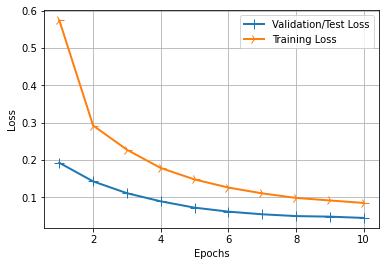

In [11]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

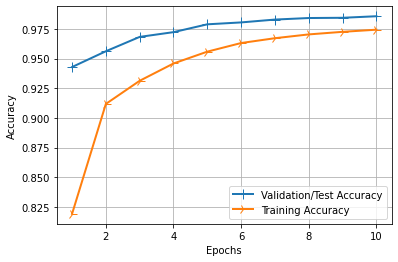

In [13]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### Saving our Model

In [14]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


### Loading  our Model

In [15]:
from keras.models import load_model
classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

### Lets input some of our test data into our classifer

In [22]:
import cv2
import numpy as np


def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(np.argmax(classifier.predict(input_im, 1, verbose = 0)[0],axis=-1))

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

### Generating the diagram of the model architecture

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


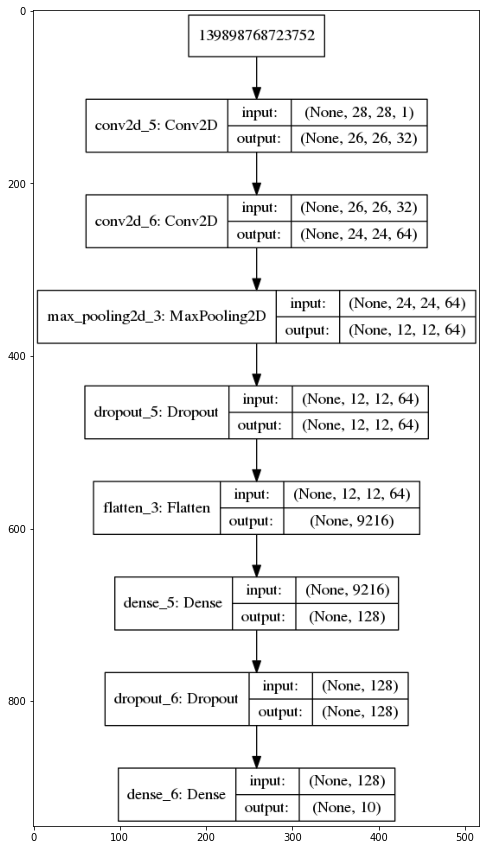

In [28]:
import matplotlib.image as mpimg
from keras.utils.vis_utils import plot_model
# Save our model diagrams to this path

model_diagrams_path = 'Downloads/DeeplearningCV/Trained Models/'

# Generate the plot
plot_model(model, to_file = model_diagrams_path + 'model_plot.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread(model_diagrams_path + 'model_plot.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img) 

### Convert keras model to tflite model

In [ ]:
import tensorflow as tf
keras_model = tf.keras.models.load_model('mnist_simple_cnn_10_Epochs.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()
open("converted_mnist_model.tflite", "wb").write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\shekh\AppData\Local\Temp\tmpu4i2z7hi\assets


### Validate Converted model

In [3]:
import tensorflow  as tf
# Load TFLite model and allocate tensors.
interpreter = tf.contrib.lite.Interpreter(model_path="converted_model.tflite") 
interpreter.allocate_tensors()
# Get input and output tensors
input_details = interpreter.get_input_details() 
output_details = interpreter.get_output_details()
# Test model on random input data
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32) 
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index']) 
print(output_data)

AttributeError: module 'tensorflow' has no attribute 'contrib'